# 1. Preliminaries

Set working directory

In [1]:
import sys
import os

os.chdir("../")

os.getcwd()

'/home/romagnolilab/Documents/GitHub/TEPaat'

Load Dependables

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import umap as ump

2023-03-28 08:58:06.252304: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-28 08:58:06.294812: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
from src.data_preprocess import DataPreprocessing
from src.dimensionality import DimensionalityReduction


Load Data

In [4]:
pathX = "data/raw/RawData.xlsx"

preprocess = DataPreprocessing()
data = preprocess.load_data(pathX, target_path = None, is_dataframe = True, justFeatures = False)

In [5]:
data.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
1,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,0.197826,...,26.662173,60.482854,0,24.229301,37.208198,46.430526,0,35.865322,12.930642,100
2,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,0.196092,...,26.689544,60.524644,0,24.171763,37.227431,46.427192,0,35.719177,11.714423,100
3,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,0.204023,...,26.705507,60.546193,0,25.179022,37.243766,46.442544,0,35.740715,10.734676,100
4,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,0.220561,...,26.768653,60.568588,0,26.922729,37.211698,46.407497,0,35.736154,10.311783,100
5,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,0.236146,...,26.396773,60.637598,0,29.039605,37.199517,46.424034,0,35.890716,11.181380,100


In [97]:
pathLabel = "data/raw/RawData_Label.xlsx"

labels = preprocess.load_data(pathLabel, target_path = None, is_dataframe = True, justFeatures = False)

In [98]:
labels

,label
1,2
2,2
3,2
4,2
5,2
...,...
1991,6
1992,6
1993,6
1994,6


Transform Data

In [6]:
norm_data = preprocess.scale_data()
norm_data.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
0,0.350968,0.292521,0.238525,0.468659,0.777944,0.757940,0.516965,0.493909,0.450876,0.240103,...,0.266622,0.464588,0.0,0.241389,0.277760,0.580246,0.0,0.788559,0.310381,0.0
1,0.350702,0.308210,0.297161,0.459386,0.788652,0.739205,0.521489,0.509693,0.256541,0.238025,...,0.266895,0.470400,0.0,0.240813,0.280527,0.578484,0.0,0.769701,0.246380,0.0
2,0.350251,0.459634,0.209477,0.479083,0.778920,0.784015,0.529546,0.463563,0.609511,0.247526,...,0.267055,0.473396,0.0,0.250898,0.282877,0.586596,0.0,0.772480,0.194822,0.0
3,0.352372,0.300972,0.251013,0.442794,0.727265,0.789300,0.533128,0.363171,0.393308,0.267338,...,0.267687,0.476511,0.0,0.268356,0.278263,0.568077,0.0,0.771891,0.172568,0.0
4,0.350848,0.234122,0.252805,0.514226,0.781072,0.752830,0.536877,0.428209,0.375227,0.286009,...,0.263968,0.486108,0.0,0.289550,0.276511,0.576815,0.0,0.791836,0.218329,0.0


# 2. Dimensionality Reduction

In [7]:
dreduction = DimensionalityReduction(data = norm_data, n_comp = 2)

## 2.1 PCA

In [8]:
pca_2D_data = dreduction.fit_PCA()

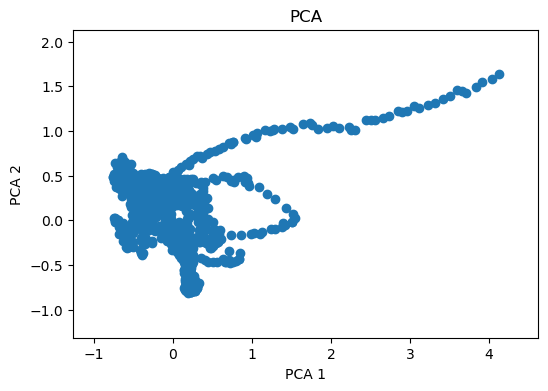

In [9]:
dreduction.plot_2D_scatter(data = pca_2D_data, type = 'PCA')

# 2.2 tSNE

In [10]:
tsne_2D_data = dreduction.fit_tSNE(perplexity = 5)

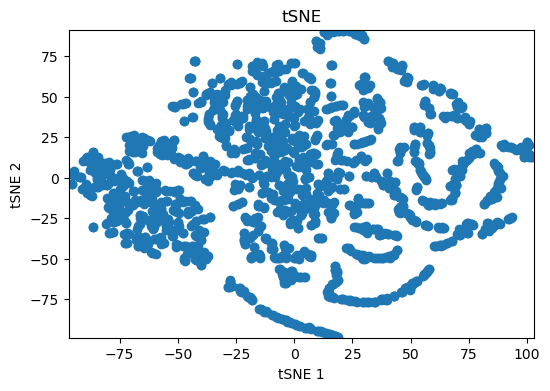

In [11]:
dreduction.plot_2D_scatter(data = tsne_2D_data, type = 'tSNE')

# 2.3 ISOMAP

In [12]:
ISOMAP_2D_data = dreduction.fit_isomap(neighbors = 5)

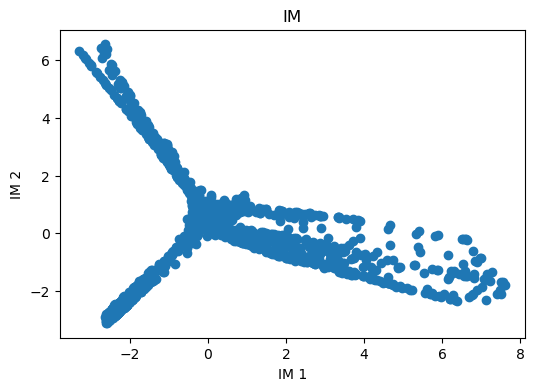

In [13]:
dreduction.plot_2D_scatter(data = ISOMAP_2D_data, type = 'IM')

# 2.4 fast ICA

In [14]:
fastICA_2D_data = dreduction.fit_fastICA(iterations = 100000)

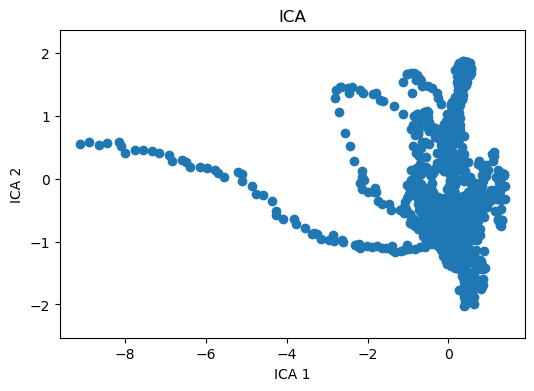

In [15]:
dreduction.plot_2D_scatter(data = fastICA_2D_data, type = 'ICA')

# 2.5 Spectral Embedding

In [16]:
embedding_2D_data = dreduction.fit_SpectralEmbedding()

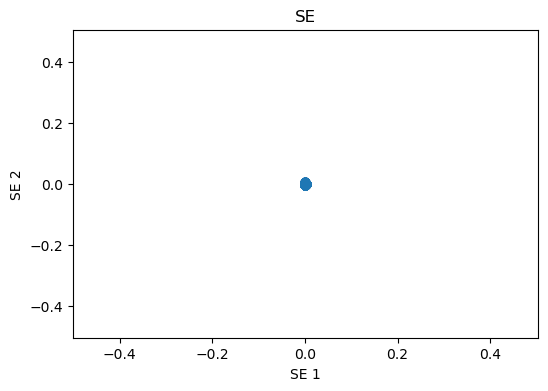

In [17]:
dreduction.plot_2D_scatter(data = embedding_2D_data, type = 'SE')

# 2.6 UMAP

In [18]:
umap_2D_data = dreduction.fit_UMAP(state = 16)

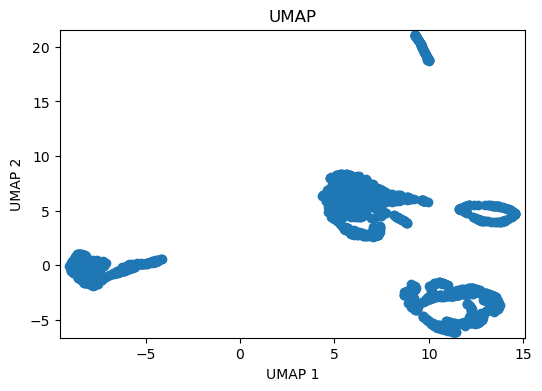

In [19]:
dreduction.plot_2D_scatter(data = umap_2D_data, type = 'UMAP')

# 2.7 Compare methods

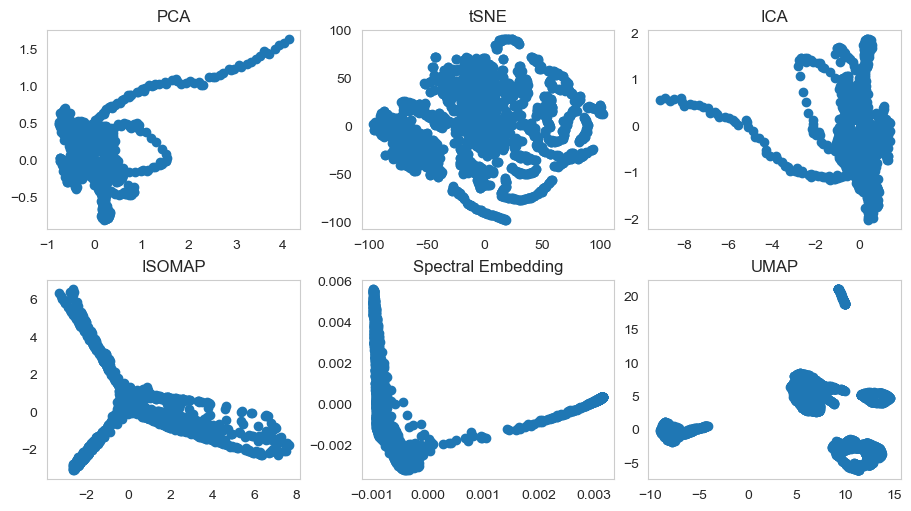

<Figure size 640x480 with 0 Axes>

In [20]:
dreduction.compare_methods(fig_size = (9, 5))

# 3. Clustering

In [21]:
from src.clustering import ClusterAnalysis


## 3.1 PCA inputs

In [22]:
PCA = ClusterAnalysis(data = pca_2D_data, clusters = 5)

### 3.1.1 KMEans

In [23]:
# fit and predict cluster
kmeans_PCA_2D_data = PCA.create_KMeans(state = 1, init = 10)

In [24]:
kmeans_PCA_2D_data

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

Estimated number of clusters: 5
Estimated number of noise points: 0


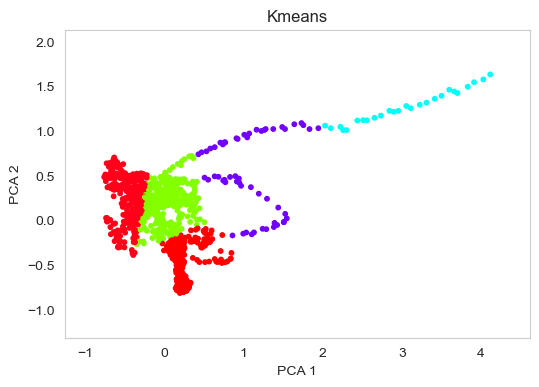

In [25]:
# plot cluster
PCA.plot_2D_scatter(type = ['PCA', 'Kmeans'])

### 3.1.2 AgglomerativeClustering

In [26]:
# fit and predict cluster
aggloClust_PCA_2D_data = PCA.create_AgglomerativeClustering()

Estimated number of clusters: 5
Estimated number of noise points: 0


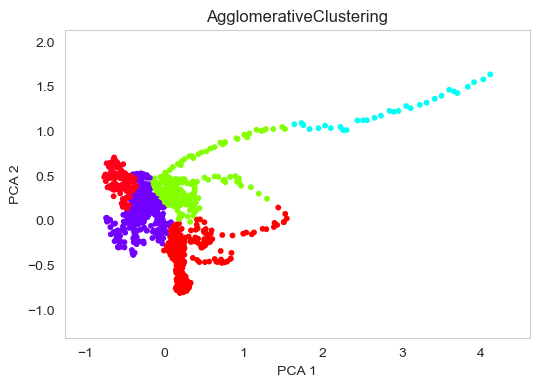

In [27]:
# plot cluster
PCA.plot_2D_scatter(type = ['PCA', 'AgglomerativeClustering'])

### 3.1.3 DBSCAN

In [28]:
# fit data and predict cluster
dbscan_with_pca = PCA.create_DBSCAN(eps_ = 0.1, min_sample_ = 5)

Estimated number of clusters: 6
Estimated number of noise points: 68


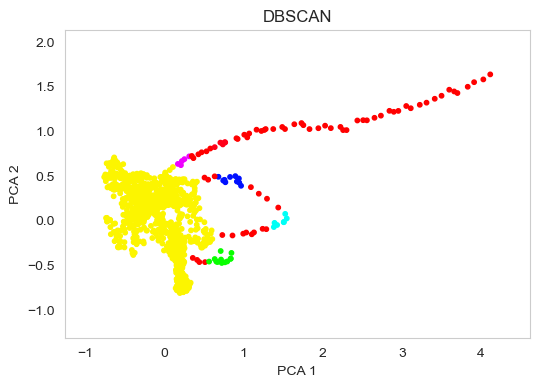

In [29]:
# plot cluster
PCA.plot_2D_scatter(type = ['PCA', 'DBSCAN'])

Effect of eps i.e. maximum distance between two samples for one to be considered as in the neighborhood of the other.

### 3.1.4 HDBSCAN

In [30]:
# fit data and predict cluster
hdbscan_PCA_2D_data = PCA.create_HDBSCAN(min_cluster_size_ = 3, min_samples_ = 50)

Estimated number of clusters: 5
Estimated number of noise points: 0


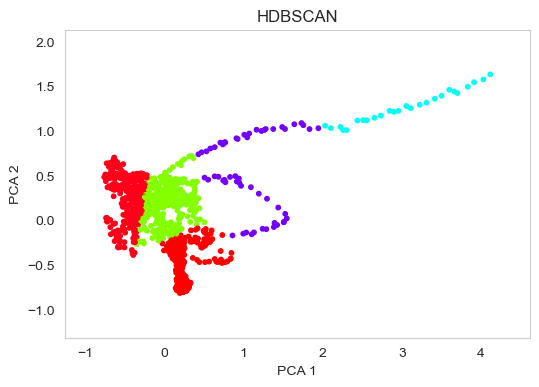

In [31]:
# plot cluster
PCA.plot_2D_scatter(type = ['PCA', 'HDBSCAN'])

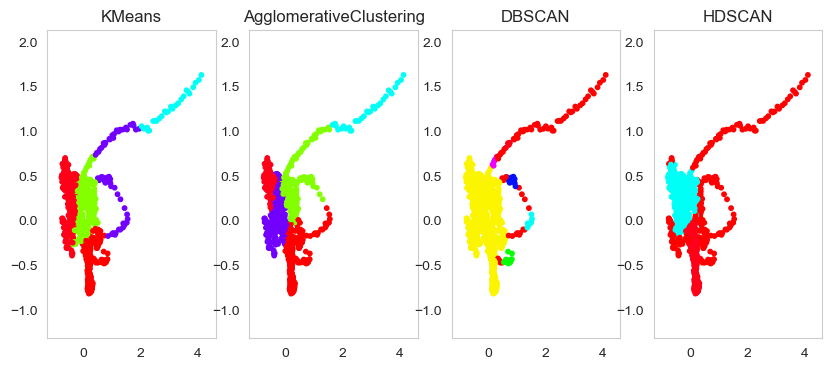

<Figure size 640x480 with 0 Axes>

In [32]:
PCA.compare_cluster(fig_size = (10, 4), type = 'PCA')

## 3.2 ISOMAP inputs

In [33]:
ISOMAP = ClusterAnalysis(data = ISOMAP_2D_data, clusters = 5)

### 3.2.1 KMEans

In [34]:
# fit data and predict cluster
kmeans_ISOMAP_2D_data = ISOMAP.create_KMeans(state = 1, init = 10)

Estimated number of clusters: 5
Estimated number of noise points: 0


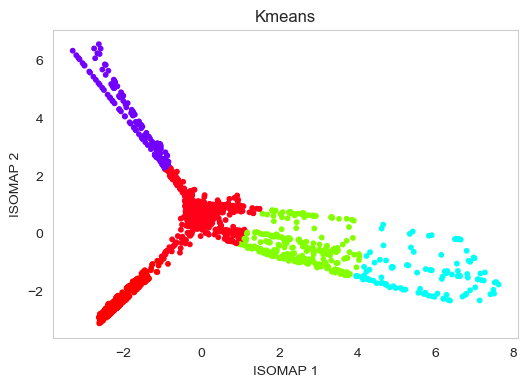

In [35]:
# plot cluster
ISOMAP.plot_2D_scatter(type = ['ISOMAP', 'Kmeans'])

### 3.2.2 AgglomerativeClustering

In [36]:
# fit data  and predict cluster
aggloClust_ISOMAP_2D_data = ISOMAP.create_AgglomerativeClustering()

Estimated number of clusters: 5
Estimated number of noise points: 0


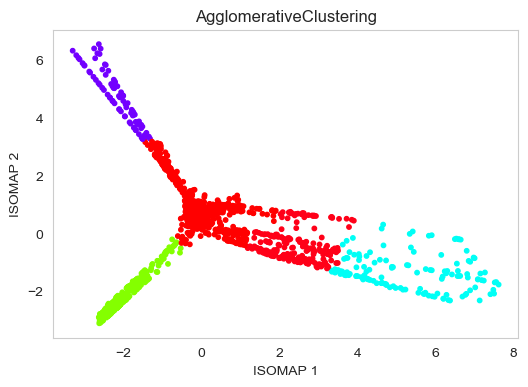

In [37]:
# plot cluster
ISOMAP.plot_2D_scatter(type = ['ISOMAP', 'AgglomerativeClustering'])

### 3.2.3 DBSCAN

In [38]:
dbscan_ISOMAP = ISOMAP.create_DBSCAN(eps_ = 0.5, min_sample_ = 10)

Estimated number of clusters: 1
Estimated number of noise points: 20


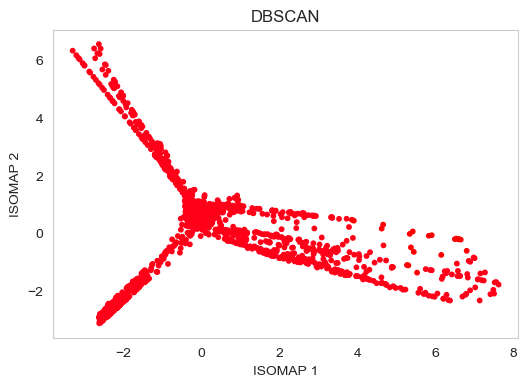

In [39]:
# plot cluster
ISOMAP.plot_2D_scatter(type = ['ISOMAP', 'DBSCAN'])

### 3.2.4 HDBSCAN

In [40]:
# fit data and predict cluster
hdbscan_ISOMAP_2D_data = ISOMAP.create_HDBSCAN(min_cluster_size_ = 5, min_samples_ = 10)

Estimated number of clusters: 5
Estimated number of noise points: 0


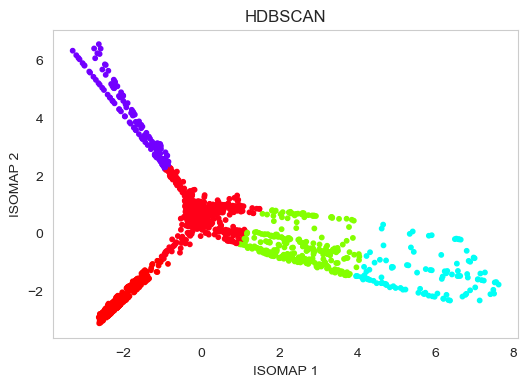

In [41]:
# plot cluster
ISOMAP.plot_2D_scatter(type = ['ISOMAP', 'HDBSCAN'])

# Compare Results

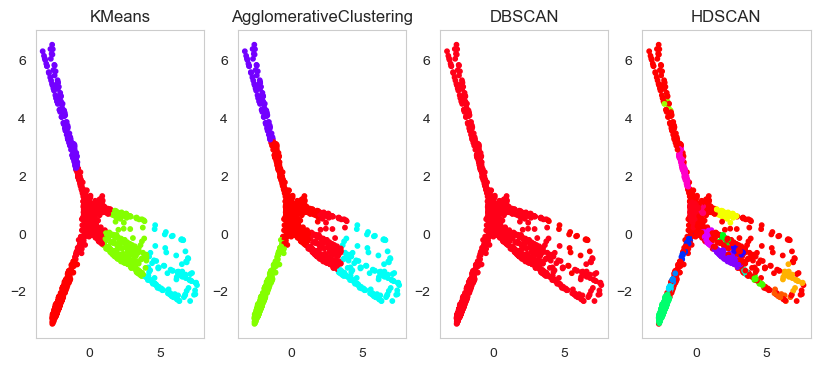

<Figure size 640x480 with 0 Axes>

In [42]:
ISOMAP.compare_cluster(fig_size = (10, 4), type = 'ISOMAP')

## 3.3 tSNE inputs

In [43]:
tSNE = ClusterAnalysis(clusters=5, data=tsne_2D_data)

### 3.3.1 KMEans

In [44]:
# fit data and predict cluster
kmeans_tSNE_2D_data = tSNE.create_KMeans(state = 1, init = 10)

Estimated number of clusters: 5
Estimated number of noise points: 0


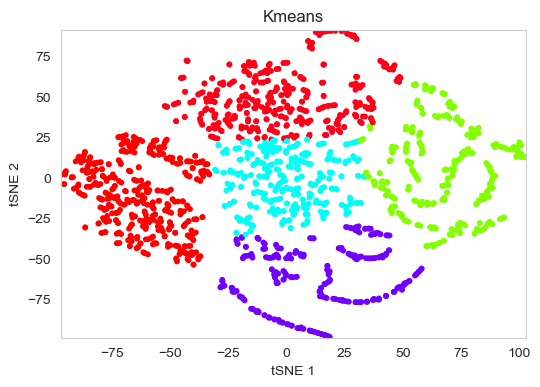

In [45]:
# plot clusters
tSNE.plot_2D_scatter(type = ['tSNE', 'Kmeans'])

### 3.3.2 AgglomerativeClustering

In [46]:
# fit and predict cluster
aggloClust_tSNE_2D_data = tSNE.create_AgglomerativeClustering()

Estimated number of clusters: 5
Estimated number of noise points: 0


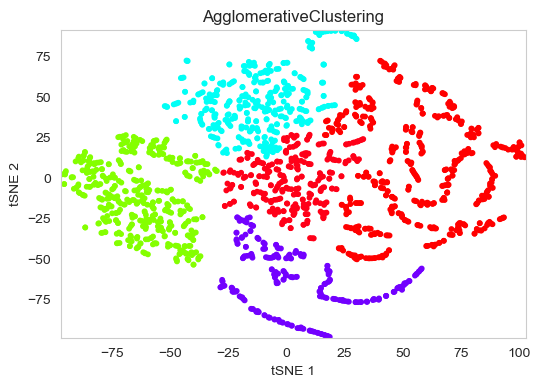

In [47]:
# plot clusters
tSNE.plot_2D_scatter(type = ['tSNE', 'AgglomerativeClustering'])

### 3.3.3 DBSCAN

In [48]:
# fit data and predict cluster
dbscan_with_tSNE = tSNE.create_DBSCAN(eps_ = 5, min_sample_ = 2)


Estimated number of clusters: 53
Estimated number of noise points: 0


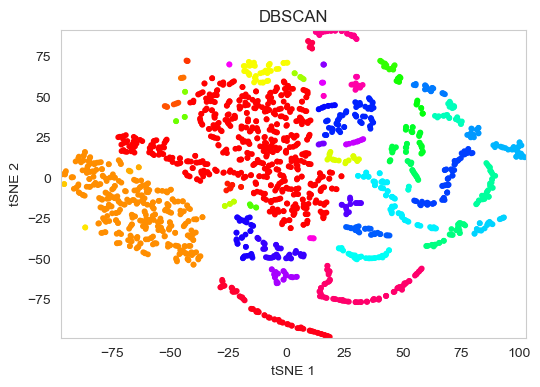

In [49]:
# plot clusters
tSNE.plot_2D_scatter(type = ['tSNE', 'DBSCAN'])

### 3.3.4 HDBSCAN

In [50]:
# fit data and predict cluster
hdbscan_tSNE_2D_data = tSNE.create_HDBSCAN(min_cluster_size_ = 20, min_samples_ = 20)

Estimated number of clusters: 5
Estimated number of noise points: 0


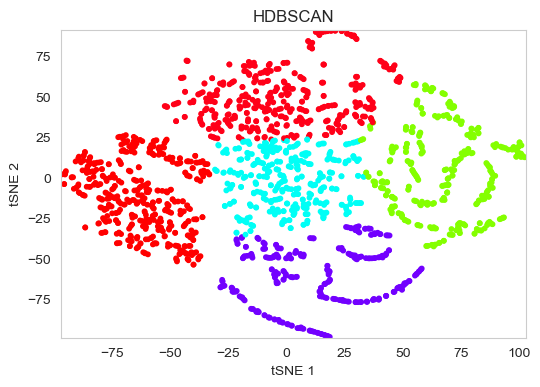

In [51]:
# plot clusters
tSNE.plot_2D_scatter(type = ['tSNE', 'HDBSCAN'])

Estimated number of clusters: 5
Estimated number of noise points: 0


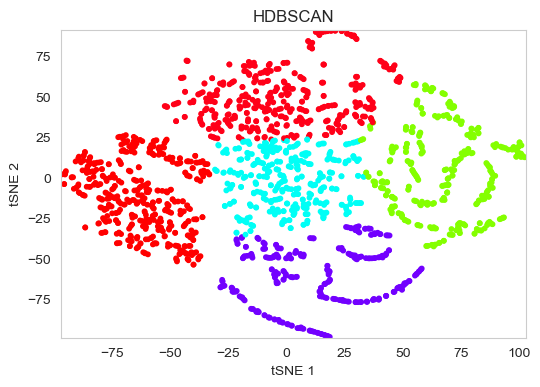

In [52]:
tSNE.plot_2D_scatter(type = ['tSNE', 'HDBSCAN'])

## 3.4 Fast ICA data

In [53]:
ICA = ClusterAnalysis(data = fastICA_2D_data, clusters = 5)

### 3.4.1 KMEans

In [54]:
# fit data and predict cluster
kmeans_ICA_2D_data = ICA.create_KMeans(state = 1, init = 10)

Estimated number of clusters: 5
Estimated number of noise points: 0


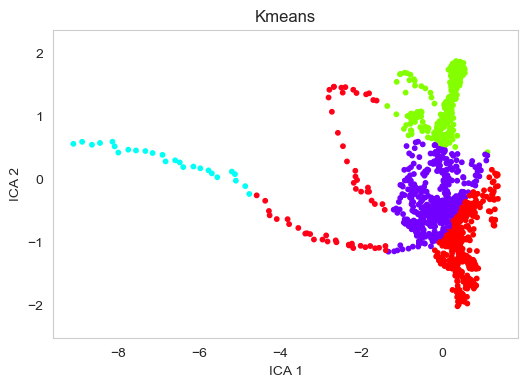

In [55]:
ICA.plot_2D_scatter(type = ['ICA', 'Kmeans'])

### 3.4.2 AgglomerativeClustering

In [56]:
# fit data and predict cluster
aggloClust_ICA_2D_data = ICA.create_AgglomerativeClustering()

Estimated number of clusters: 5
Estimated number of noise points: 0


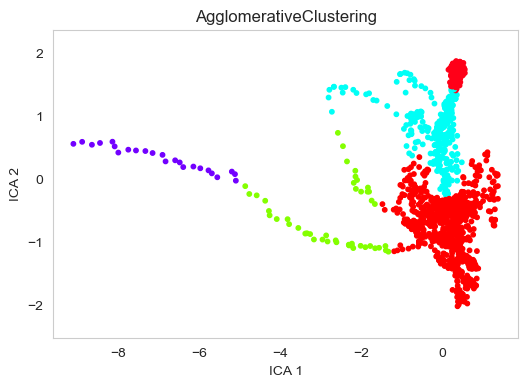

In [57]:
# plot cluster
ICA.plot_2D_scatter(type = ['ICA', 'AgglomerativeClustering'])

### 3.3.3 DBSCAN

In [58]:
# fit data and predict cluster
dbscan_with_ICA = ICA.create_DBSCAN(eps_ = 0.4, min_sample_ = 5)


Estimated number of clusters: 5
Estimated number of noise points: 5


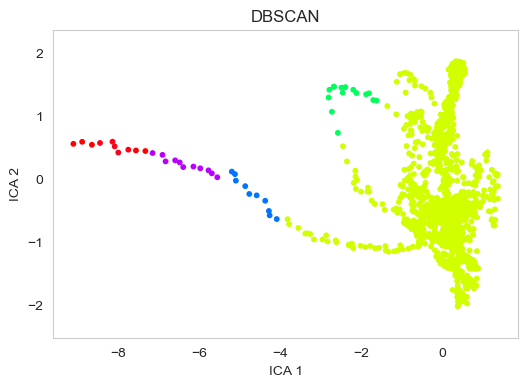

In [59]:
# plot cluster
ICA.plot_2D_scatter(type = ['ICA', 'DBSCAN'])

### 3.3.4 HDBSCAN

In [60]:
# fit data and predict cluster
hdbscan_ICA_2D_data = ICA.create_HDBSCAN(min_cluster_size_ = 20, min_samples_ = 30)

Estimated number of clusters: 5
Estimated number of noise points: 0


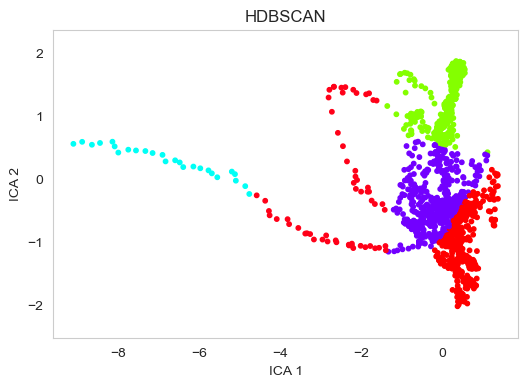

In [61]:
# plot cluster
ICA.plot_2D_scatter(type = ['ICA', 'HDBSCAN'])



# Compare clusters

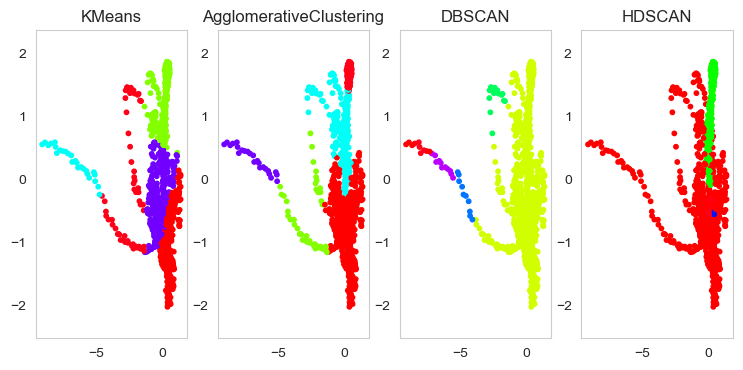

<Figure size 640x480 with 0 Axes>

In [62]:
ICA.compare_cluster(fig_size = (9, 4), type = 'ICA')

## 3.5 Spectral Embedding data

In [63]:
SE = ClusterAnalysis(data = embedding_2D_data, clusters = 5)

### 3.5.1 KMEans

In [64]:
# fit data and predict cluster
kmeans_EMBED_2D_data = SE.create_KMeans(state = 1, init = 10)

Estimated number of clusters: 5
Estimated number of noise points: 0


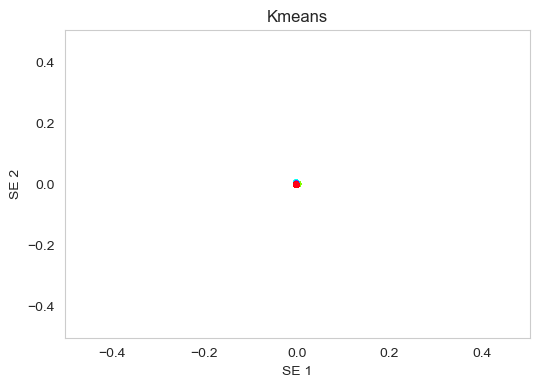

In [65]:
# plot cluster
SE.plot_2D_scatter(type = ['SE', 'Kmeans'])

### 3.5.2 AgglomerativeClustering

In [66]:
# fit data and predict cluster
aggloClust_EMBED_2D_data = SE.create_AgglomerativeClustering()

Estimated number of clusters: 5
Estimated number of noise points: 0


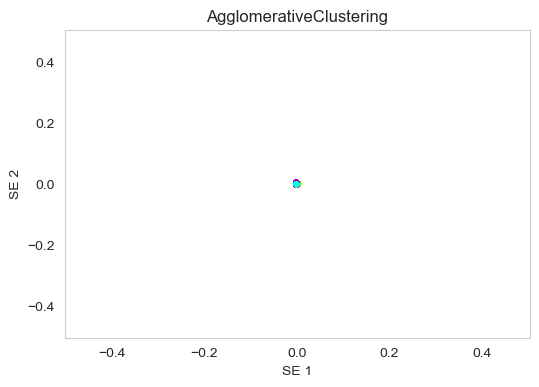

In [67]:
# plot cluster
SE.plot_2D_scatter(type = ['SE', 'AgglomerativeClustering'])

### 3.5.3 DBSCAN

In [68]:
# fit data and predict cluster
dbscan_with_EMBED = SE.create_DBSCAN(eps_ = 0.1, min_sample_ = 1)


Estimated number of clusters: 1
Estimated number of noise points: 0


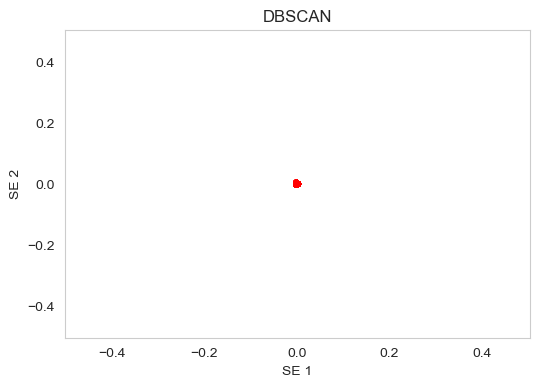

In [69]:
# plot cluster
SE.plot_2D_scatter(type = ['SE', 'DBSCAN'])

### 3.5.4 HDBSCAN

In [70]:
# fit data and predict cluster
hdbscan_EMBED_2D_data = SE.create_HDBSCAN(min_cluster_size_ = 5, min_samples_ = 38)


Estimated number of clusters: 5
Estimated number of noise points: 0


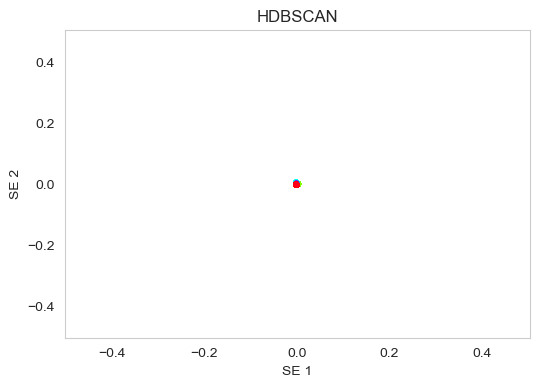

In [71]:
# plot cluster
SE.plot_2D_scatter(type = ['SE', 'HDBSCAN'])

# Compare methods

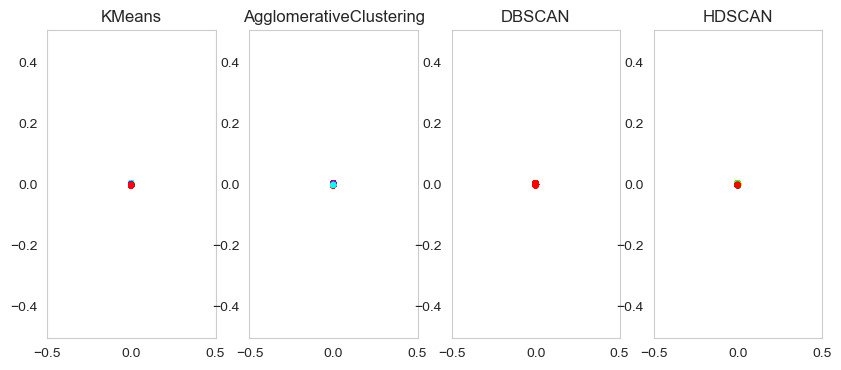

<Figure size 640x480 with 0 Axes>

In [72]:
SE.compare_cluster(fig_size = (10, 4), type = 'SE')

## 3.6 UMAP data

In [73]:
UMAP = ClusterAnalysis(clusters = 5, data = umap_2D_data)

### 3.6.1 KMEans

In [74]:
# fit data and predict cluster
kmeans_UMAP_2D_data = UMAP.create_KMeans(state = 1, init = 10)

Estimated number of clusters: 5
Estimated number of noise points: 0


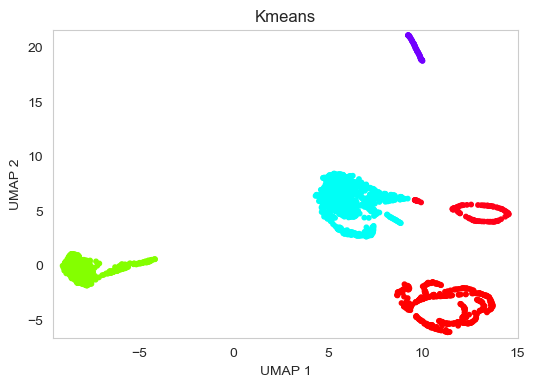

In [75]:
# plot cluster
UMAP.plot_2D_scatter(type = ['UMAP', 'Kmeans'])

### 3.6.2 AgglomerativeClustering

In [76]:
# fit data and predict cluster
aggloClust_UMAP_2D_data = UMAP.create_AgglomerativeClustering()

Estimated number of clusters: 5
Estimated number of noise points: 0


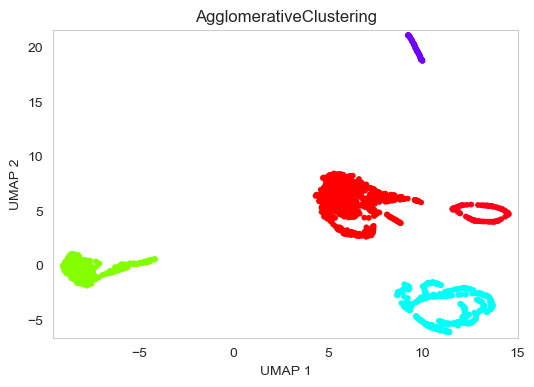

In [77]:
# plot cluster
UMAP.plot_2D_scatter(type = ['UMAP', 'AgglomerativeClustering'])

### 3.6.3 DBSCAN

In [78]:
# fit data and predict cluster
dbscan_with_UMAP = UMAP.create_DBSCAN(eps_ = 0.5, min_sample_ = 5)


Estimated number of clusters: 5
Estimated number of noise points: 0


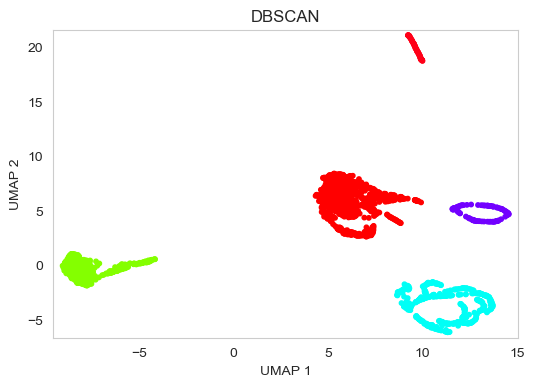

In [79]:
# plot cluster
UMAP.plot_2D_scatter(type = ['UMAP', 'DBSCAN'])

### 3.5.4 HDBSCAN

In [80]:
# fit data and predict cluster
hdbscan_UMAP_2D_data = UMAP.create_HDBSCAN(min_cluster_size_ = 5, min_samples_ = 15)

Estimated number of clusters: 5
Estimated number of noise points: 0


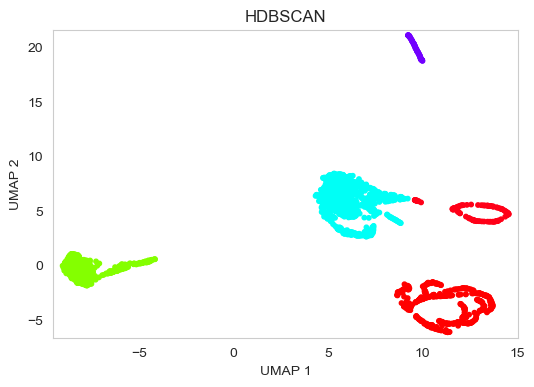

In [81]:
# plot cluster
UMAP.plot_2D_scatter(type = ['UMAP', 'HDBSCAN'])

# Comparison

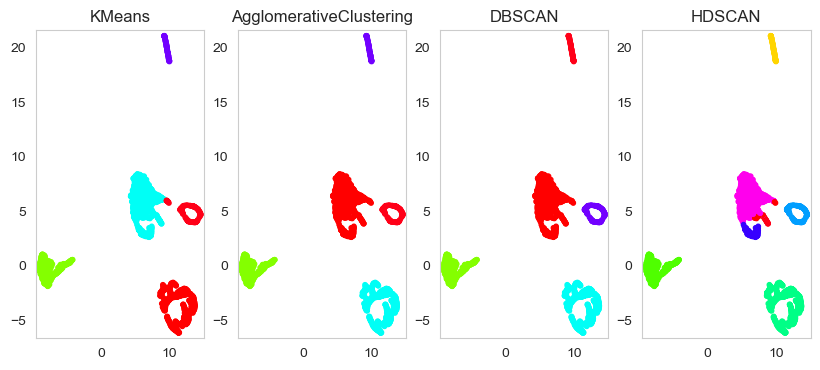

<Figure size 640x480 with 0 Axes>

In [82]:
UMAP.compare_cluster(fig_size = (10, 4), type = 'UMAP')

# 4. Comparison of Results

In [83]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

In [84]:
# PCA
# Example lists
cluster_list = ['KMeans', 'Agglom', 'DBSCAN', 'HDBSCAN']

## 4.1. PCA

In [85]:
input = pca_2D_data

data_list = [kmeans_PCA_2D_data, aggloClust_PCA_2D_data, dbscan_with_pca, hdbscan_PCA_2D_data]

for title, data_ in zip(cluster_list, data_list):
    print(f"Type: {title}, score: {davies_bouldin_score(X = input, labels = data_)}")

Type: KMeans, score: 0.7418477536990971
Type: Agglom, score: 0.65581354854727
Type: DBSCAN, score: 1.0339640354802315
Type: HDBSCAN, score: 1.2804989420286814


# 4.2. tSNE

In [86]:
input = tsne_2D_data
data_list = [kmeans_tSNE_2D_data, aggloClust_tSNE_2D_data, dbscan_with_tSNE, hdbscan_tSNE_2D_data]

for title, data_ in zip(cluster_list, data_list):
    print(f"Type: {title}, score: {davies_bouldin_score(X = input, labels = data_)}")

Type: KMeans, score: 0.8151436506316315
Type: Agglom, score: 0.8530400873884171
Type: DBSCAN, score: 0.7625094217210071
Type: HDBSCAN, score: 1.3254588145069268


# 4.3 ICA

In [87]:
input = fastICA_2D_data
data_list = [kmeans_ICA_2D_data, aggloClust_ICA_2D_data, dbscan_with_ICA, hdbscan_ICA_2D_data]

for title, data_ in zip(cluster_list, data_list):
    print(f"Type: {title}, score: {davies_bouldin_score(X = input, labels = data_)}")

Type: KMeans, score: 0.7652949998641768
Type: Agglom, score: 0.6353118279862028
Type: DBSCAN, score: 1.6676271298003185
Type: HDBSCAN, score: 2.220667210317247


# 4.4 Spectral Embedding

# 4.5 ISOMAP

In [88]:
input = ISOMAP_2D_data
data_list = [kmeans_ISOMAP_2D_data, aggloClust_ISOMAP_2D_data, dbscan_ISOMAP, hdbscan_ISOMAP_2D_data]

for title, data_ in zip(cluster_list, data_list):
    print(f"Type: {title}, score: {davies_bouldin_score(X = input, labels = data_)}")

Type: KMeans, score: 0.48474767211413117
Type: Agglom, score: 0.48505386217258756
Type: DBSCAN, score: 0.5207222051992648
Type: HDBSCAN, score: 1.928046694355611


# 4.6 UMAP

In [89]:
input = umap_2D_data
data_list = [kmeans_UMAP_2D_data, aggloClust_UMAP_2D_data, dbscan_with_UMAP, hdbscan_UMAP_2D_data]

for title, data_ in zip(cluster_list, data_list):
    print(f"Type: {title}, score: {davies_bouldin_score(X = input, labels = data_)}")

Type: KMeans, score: 0.32389420612093095
Type: Agglom, score: 0.2977308308300886
Type: DBSCAN, score: 0.2977308308300886
Type: HDBSCAN, score: 0.7300577820329606


In [90]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_performance(fig_size):
    
    cluster_list = ['KMeans', 'Agglom', 'DBSCAN', 'HDBSCAN']

    # computed clusters
    data_list = {
                    'PCA':[kmeans_PCA_2D_data, aggloClust_PCA_2D_data, dbscan_with_pca, hdbscan_PCA_2D_data],
                    'tSNE': [kmeans_tSNE_2D_data, aggloClust_tSNE_2D_data, dbscan_with_tSNE, hdbscan_tSNE_2D_data],
                    'ISOMAP': [kmeans_ISOMAP_2D_data, aggloClust_ISOMAP_2D_data, dbscan_ISOMAP, hdbscan_ISOMAP_2D_data],
                    'ICA': [kmeans_ICA_2D_data, aggloClust_ICA_2D_data, dbscan_with_ICA, hdbscan_ICA_2D_data],
                    'UMAP': [kmeans_UMAP_2D_data, aggloClust_UMAP_2D_data, dbscan_with_UMAP, hdbscan_UMAP_2D_data]   
                }

    data_inputs = {
                    'PCA': pca_2D_data,
                    'tSNE': tsne_2D_data,
                    'ISOMAP': ISOMAP_2D_data,
                    'ICA': fastICA_2D_data,
                    'UMAP': umap_2D_data
                    }

    # Compute score for each set of clustered data average similarity measure of each cluster with its most similar cluster
    def compute_dbs(cluster_data, X, type = 'DBS'):
        if type == 'DBS':
            score = davies_bouldin_score(X, cluster_data)
        if type == 'SS':
            score = silhouette_score(X, cluster_data)
        if type == 'CHS':
            score = calinski_harabasz_score(X, cluster_data)
        return score

    result = {}
    for score in ['DBS', 'SS', 'CHS']:
        
        # Create an empty dataframe
        df = pd.DataFrame(columns=cluster_list)

        # Populate the dataframe with the cluster data and Davies-Bouldin scores
        for data_name, cluster_data in data_list.items():
            row = []
            for i in range(len(cluster_list)):
                dbs = compute_dbs(cluster_data[i], data_inputs[data_name], type = score)
                row.append(dbs)
            df.loc[data_name] = row

        # Add column names to the dataframe
        df.columns = cluster_list

        # add to the list
        result[score] = df
    

    # Create the barplot
    fig = plt.figure(figsize = (fig_size))

    ax1 = fig.add_subplot(311)
    result['DBS'].plot(kind='bar', ax = ax1)
    ax1.set_ylabel('Davies-Bouldin Score')
    plt.xticks([])

    ax2 = fig.add_subplot(312)
    result['SS'].plot(kind='bar', ax = ax2)
    ax2.set_ylabel('Silhouette Score')
    plt.legend('',frameon=False)
    plt.xticks([])

    ax3 = fig.add_subplot(313)
    result['CHS'].plot(kind='bar', ax = ax3)
    ax3.set_ylabel('Calinski Harabasz Score')
    ax3.set_xlabel('Dimensionality Reduction Technique')
    plt.legend('',frameon=False)

    # Show the plot
    plt.show()

    return result


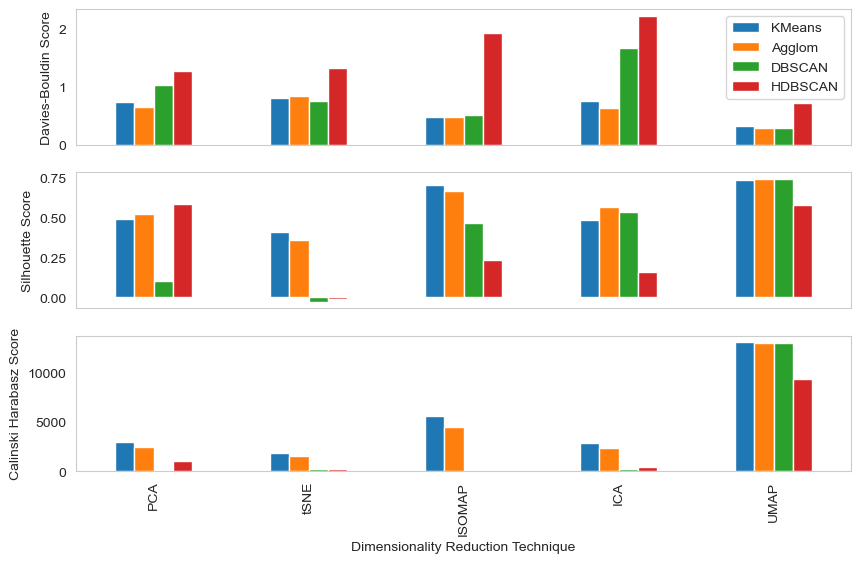

In [91]:
clustering_summary = plot_performance(fig_size=(10, 6))

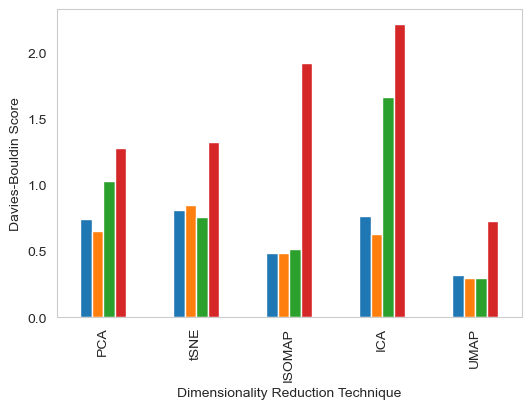

In [92]:
# Create the barplot
fig, ax = plt.subplots(figsize=(6, 4))
clustering_summary['DBS'].plot(kind='bar', ax=ax)

# Add labels and titles
ax.set_xlabel('Dimensionality Reduction Technique')
ax.set_ylabel('Davies-Bouldin Score')
plt.legend('',frameon=False)
# Show the plot
plt.show()


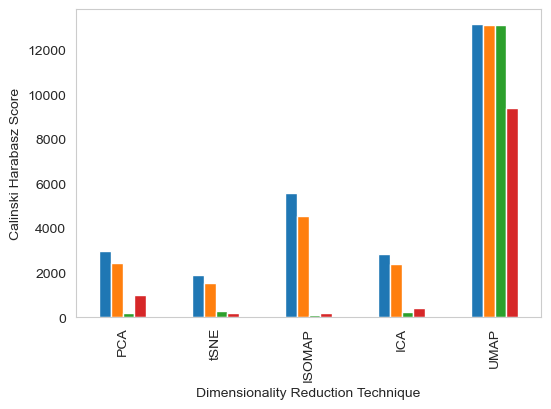

In [93]:
# Create the barplot
fig, ax = plt.subplots(figsize=(6, 4))
clustering_summary['CHS'].plot(kind='bar', ax=ax)

# Add labels and titles
ax.set_xlabel('Dimensionality Reduction Technique')
ax.set_ylabel('Calinski Harabasz Score')
plt.legend('',frameon=False)
# Show the plot
plt.show()


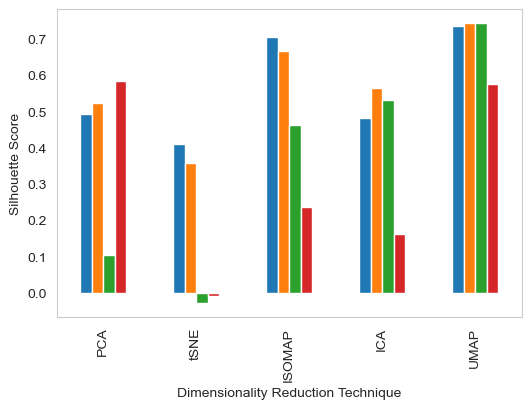

In [94]:
# Create the barplot
fig, ax = plt.subplots(figsize=(6, 4))
clustering_summary['SS'].plot(kind='bar', ax=ax)

# Add labels and titles
ax.set_xlabel('Dimensionality Reduction Technique')
ax.set_ylabel('Silhouette Score')
plt.legend('',frameon=False)
# Show the plot
plt.show()


In [100]:
def plot_2D_scatter_updated(data, targetLabels, predLabels, type = ['PCA', 'Kmeans']):
    """
    params: data (a 2D data) & labels (a dictionary)
    returns: profile of scatterplot of transformed data
    """
    x = data[:, 0]
    y = data[:, 1]

    plt.figure(figsize=(6, 4))
    plt.scatter(x = x, y = y, c = predLabels, s = 10,  cmap = 'hsv')
    plt.scatter(x = x, y = y, c = targetLabels, s = 10,  cmap = 'hsv')

    plt.xlabel(f"{type[0]} 1")
    plt.ylabel(f"{type[0]} 2")
    plt.title(type[1])

    plt.xlim([x.min() - 0.5, x.max() + 0.5])
    plt.ylim([y.min() - 0.5, y.max() + 0.5])
    plt.legend('',frameon=False)
    

In [110]:
def plot_2D_scatter_updated(data, targetLabels, predLabels, type=['PCA', 'Kmeans']):
    """
    params: data (a 2D data), targetLabels (a list of labels), predLabels (a list of predicted labels),
            type (a list of strings for the plot title and axis labels)
    returns: scatterplot of transformed data
    """
    import numpy as np
    x = data[:, 0]
    y = data[:, 1]
    
    # Compute center positions for each unique label in targetLabels
    # centers = {}
    # for label in set(targetLabels):
    #     label_data = data[targetLabels == label]
    #     centers[label] = np.mean(label_data, axis=0)
    
    # Create scatterplot
    plt.figure(figsize=(6, 4))
    plt.scatter(x=x, y=y, c=targetLabels, s=10, cmap='hsv')
    
    # # Add predicted labels to the plot
    # for i, pred_label in enumerate(predLabels):
    #     plt.text(x[i], y[i], str(pred_label), fontsize=8, color='black', ha='center', va='center')
    
    # Add center positions to the plot
    # for label, center in centers.items():
    #     plt.scatter(center[0], center[1], c='black', marker='x', s=50)
    #     plt.text(center[0], center[1], str(label), fontsize=10, color='black', ha='center', va='center')
    
    plt.xlabel(f"{type[0]} 1")
    plt.ylabel(f"{type[0]} 2")
    plt.title(type[1])
    plt.xlim([x.min() - 0.5, x.max() + 0.5])
    plt.ylim([y.min() - 0.5, y.max() + 0.5])
    plt.legend('', frameon=False)


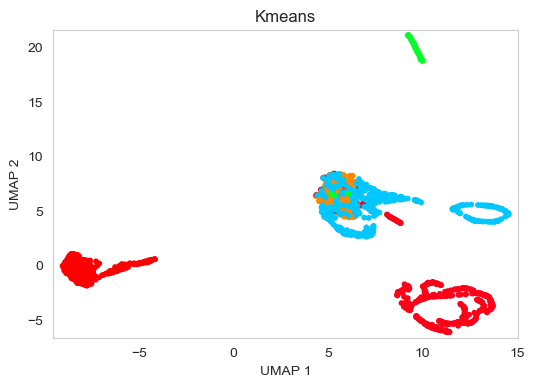

In [117]:
plot_2D_scatter_updated(data = umap_2D_data, targetLabels = labels['label'], predLabels = kmeans_UMAP_2D_data, type = ['UMAP', 'Kmeans'])